In [23]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/data\db\collection-0--2641255188981931325.wt
/data\db\collection-0--7375170263173339037.wt
/data\db\collection-0-4572410231294925841.wt
/data\db\collection-0-7067964211854103265.wt
/data\db\collection-0-8938152883700851741.wt
/data\db\collection-2-7067964211854103265.wt
/data\db\collection-4-7067964211854103265.wt
/data\db\index-1--2641255188981931325.wt
/data\db\index-1--7375170263173339037.wt
/data\db\index-1-4572410231294925841.wt
/data\db\index-1-7067964211854103265.wt
/data\db\index-1-8938152883700851741.wt
/data\db\index-3-7067964211854103265.wt
/data\db\index-5-7067964211854103265.wt
/data\db\index-6-7067964211854103265.wt
/data\db\mongod.lock
/data\db\sizeStorer.wt
/data\db\storage.bson
/data\db\WiredTiger
/data\db\WiredTiger.lock
/data\db\WiredTiger.turtle
/data\db\WiredTiger.wt
/data\db\WiredTigerLAS.wt
/data\db\_mdb_catalog.wt
/data\db\diagnostic.data\metrics.2018-08-20T15-03-55Z-00000
/data\db\diagnostic.data\metrics.2018-08-24T17-42-51Z-00000
/data\db\diagnostic.data\metr

In [26]:
df=pd.read_csv("data-world/covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [27]:
df.shape

(39347, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39347 entries, 0 to 39346
Data columns (total 8 columns):
SNo                39347 non-null int64
ObservationDate    39347 non-null object
Province/State     21670 non-null object
Country/Region     39347 non-null object
Last Update        39347 non-null object
Confirmed          39347 non-null float64
Deaths             39347 non-null float64
Recovered          39347 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.4+ MB


In [29]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
df['Last Update']=pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [31]:
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
38622,38623,2020-06-10,NaN,Afghanistan,2020-06-11 03:33:41,22142,405,3013
38623,38624,2020-06-10,NaN,Albania,2020-06-11 03:33:41,1341,34,980
38624,38625,2020-06-10,NaN,Algeria,2020-06-11 03:33:41,10484,732,7074
38625,38626,2020-06-10,NaN,Andorra,2020-06-11 03:33:41,852,51,759
38626,38627,2020-06-10,NaN,Angola,2020-06-11 03:33:41,113,4,40
...,...,...,...,...,...,...,...,...
39342,39343,2020-06-10,Zacatecas,Mexico,2020-06-11 03:33:41,423,53,266
39343,39344,2020-06-10,Zakarpattia Oblast,Ukraine,2020-06-11 03:33:41,1448,33,628
39344,39345,2020-06-10,Zaporizhia Oblast,Ukraine,2020-06-11 03:33:41,502,15,296
39345,39346,2020-06-10,Zhejiang,Mainland China,2020-06-11 03:33:41,1268,1,1267


In [32]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     170
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [34]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region']
if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull
(x['Province/State']) else x['Province/State'],axis=1)

In [35]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

df_update['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
38622,38623,2020-06-10,Afghanistan,Afghanistan,2020-06-11 03:33:41,22142,405,3013,3,0
38623,38624,2020-06-10,Albania,Albania,2020-06-11 03:33:41,1341,34,980,10,1
38624,38625,2020-06-10,Algeria,Algeria,2020-06-11 03:33:41,10484,732,7074,12,2
38625,38626,2020-06-10,Andorra,Andorra,2020-06-11 03:33:41,852,51,759,22,3
38626,38627,2020-06-10,Angola,Angola,2020-06-11 03:33:41,113,4,40,23,4


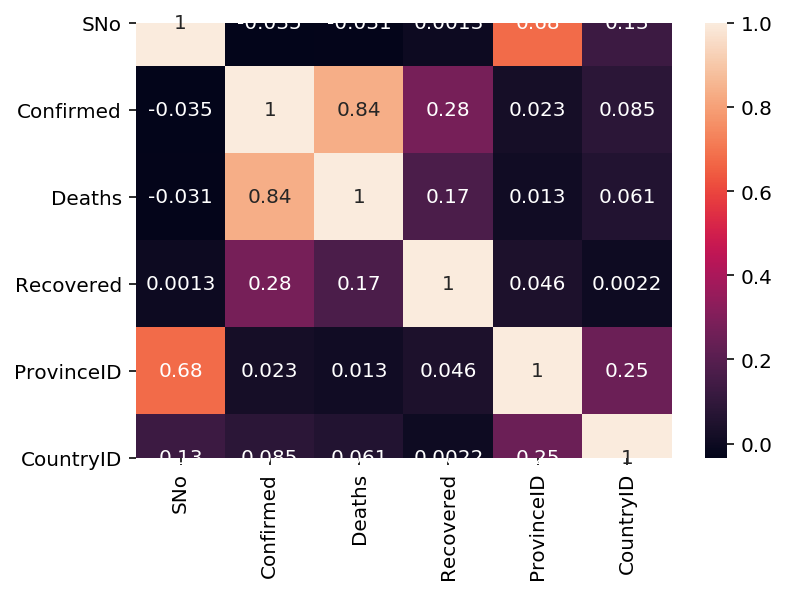

In [41]:
corr=df_update.corr()
sns.heatmap(corr,annot=True)

In [42]:
print(df['Country/Region'].unique())
print("\n Number of Countries impacted by Covid-19 : ",len(df['Country/Region'].unique()))

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

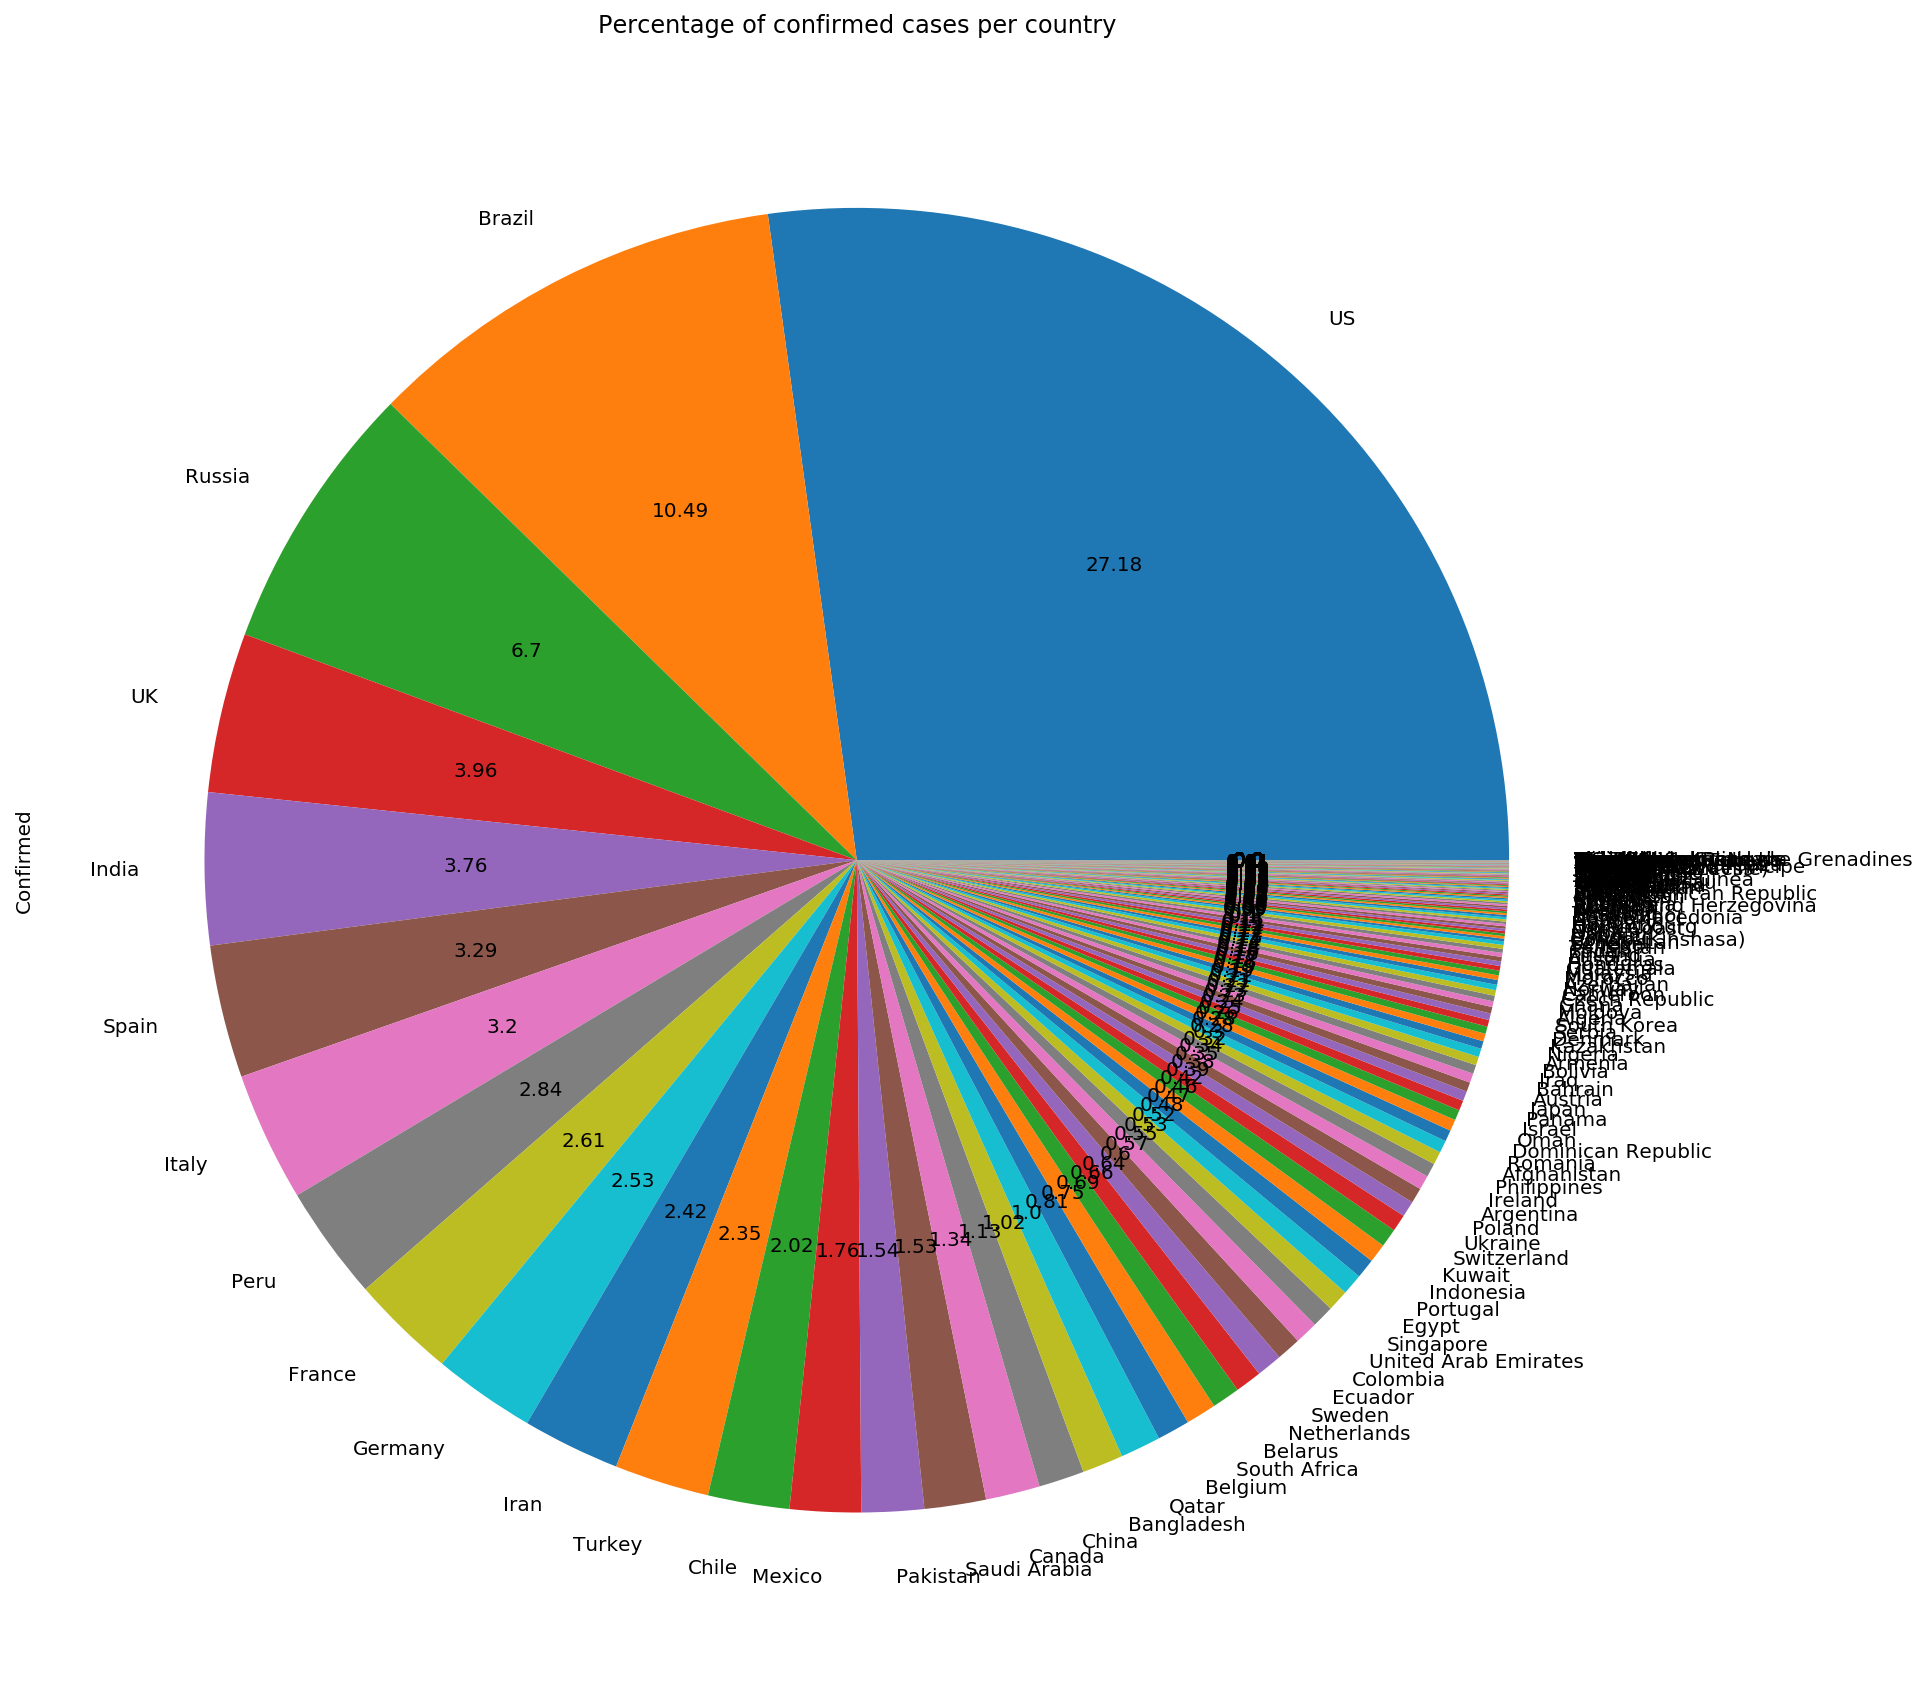

In [45]:
fig=plt.figure(figsize=(15,15))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a=val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country'
,autopct=absolute_value)
plt.show()

In [47]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,2000464,533504,112924
1,Brazil,772416,413916,39680
2,Russia,493023,252295,6350
3,UK,291588,1269,41213
4,India,276583,135206,7745


In [49]:
group_cases['Recovery Rate']=round(group_cases['Recovered']/group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths']/group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed',ascending=False)
group_cases.style.background_gradient(cmap='Greens')


,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,2000464,533504,112924,0.27,0.06
1,Brazil,772416,413916,39680,0.54,0.05
2,Russia,493023,252295,6350,0.51,0.01
3,UK,291588,1269,41213,0,0.14
4,India,276583,135206,7745,0.49,0.03


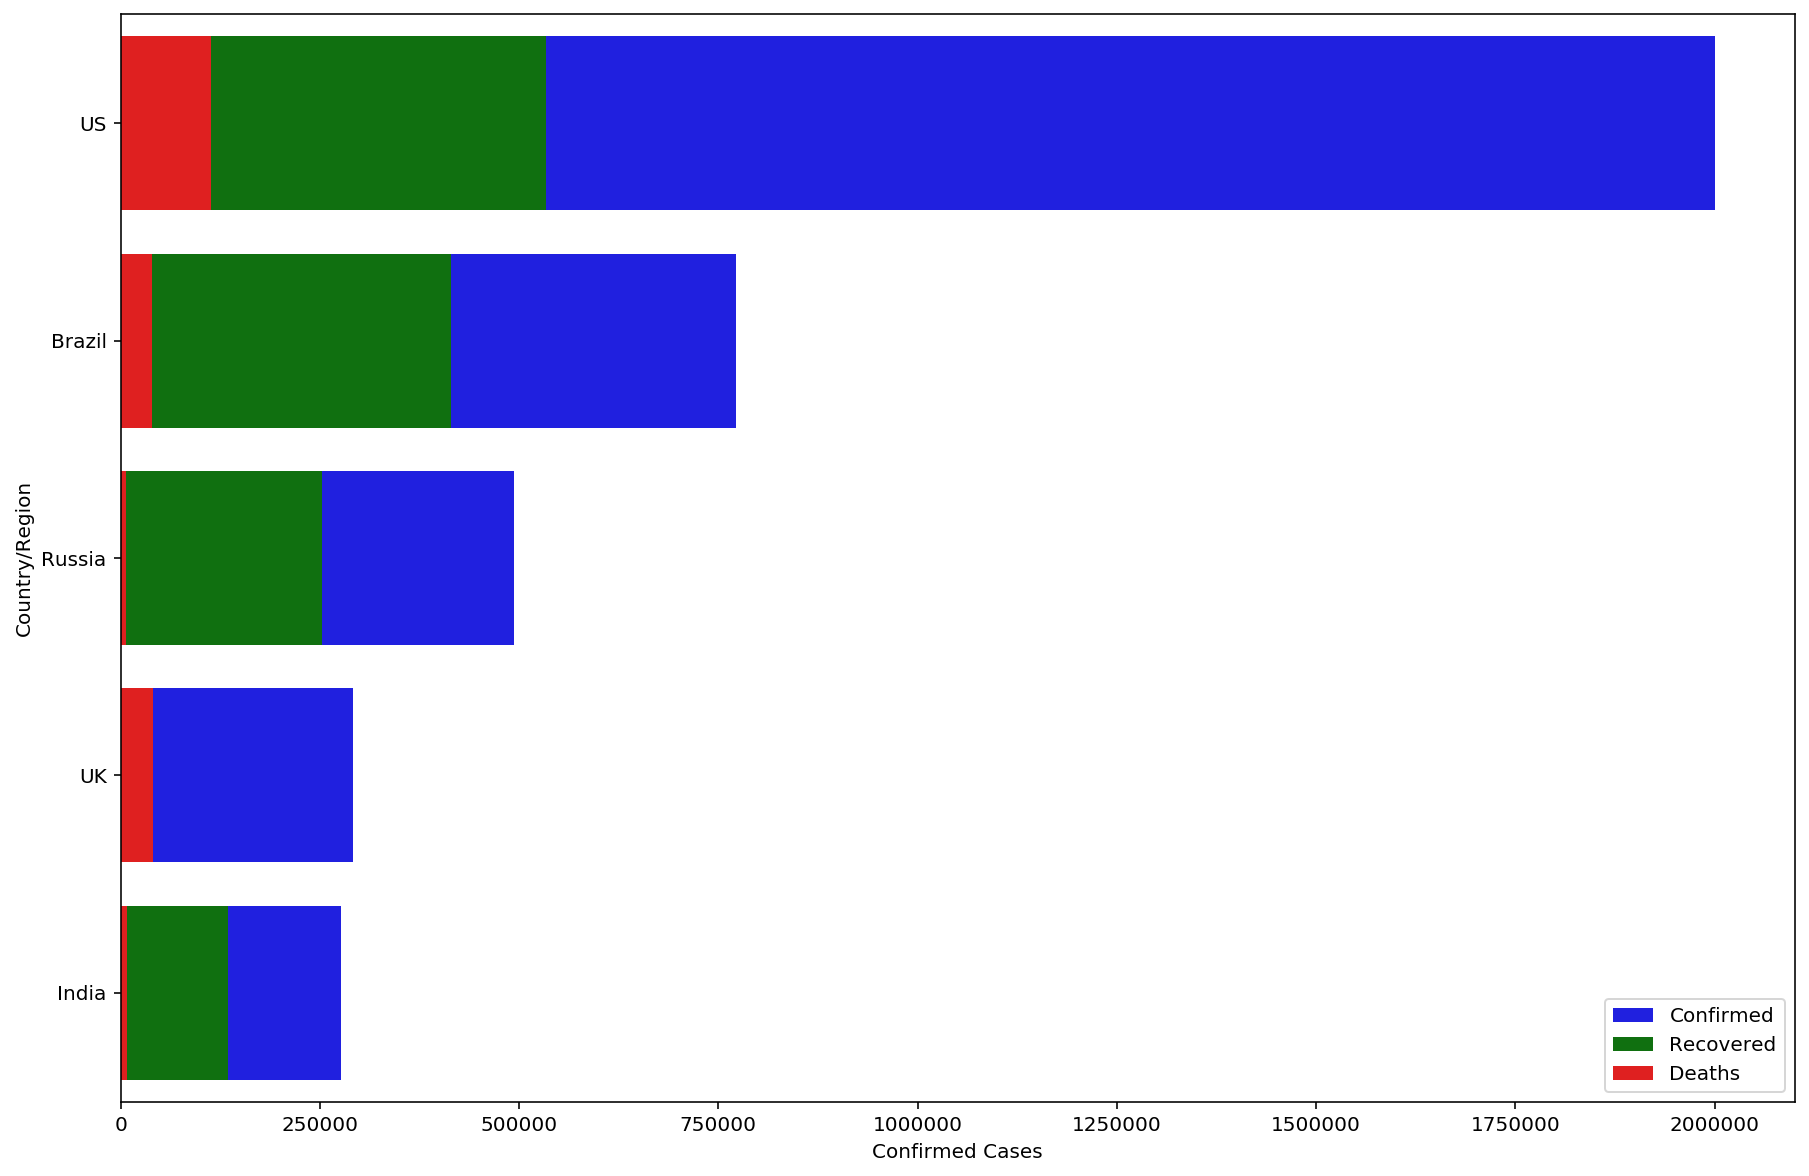

In [54]:
f,ax=plt.subplots(figsize=(15,10))
bar1=sns.barplot(x='Confirmed',y='Country/Region',data=group_cases,label='Confirmed',color='b')
bar2=sns.barplot(x='Recovered',y='Country/Region',data=group_cases,label='Recovered',color='g')
bar3=sns.barplot(x='Deaths',y='Country/Region',data=group_cases,label='Deaths',color='r')
ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()


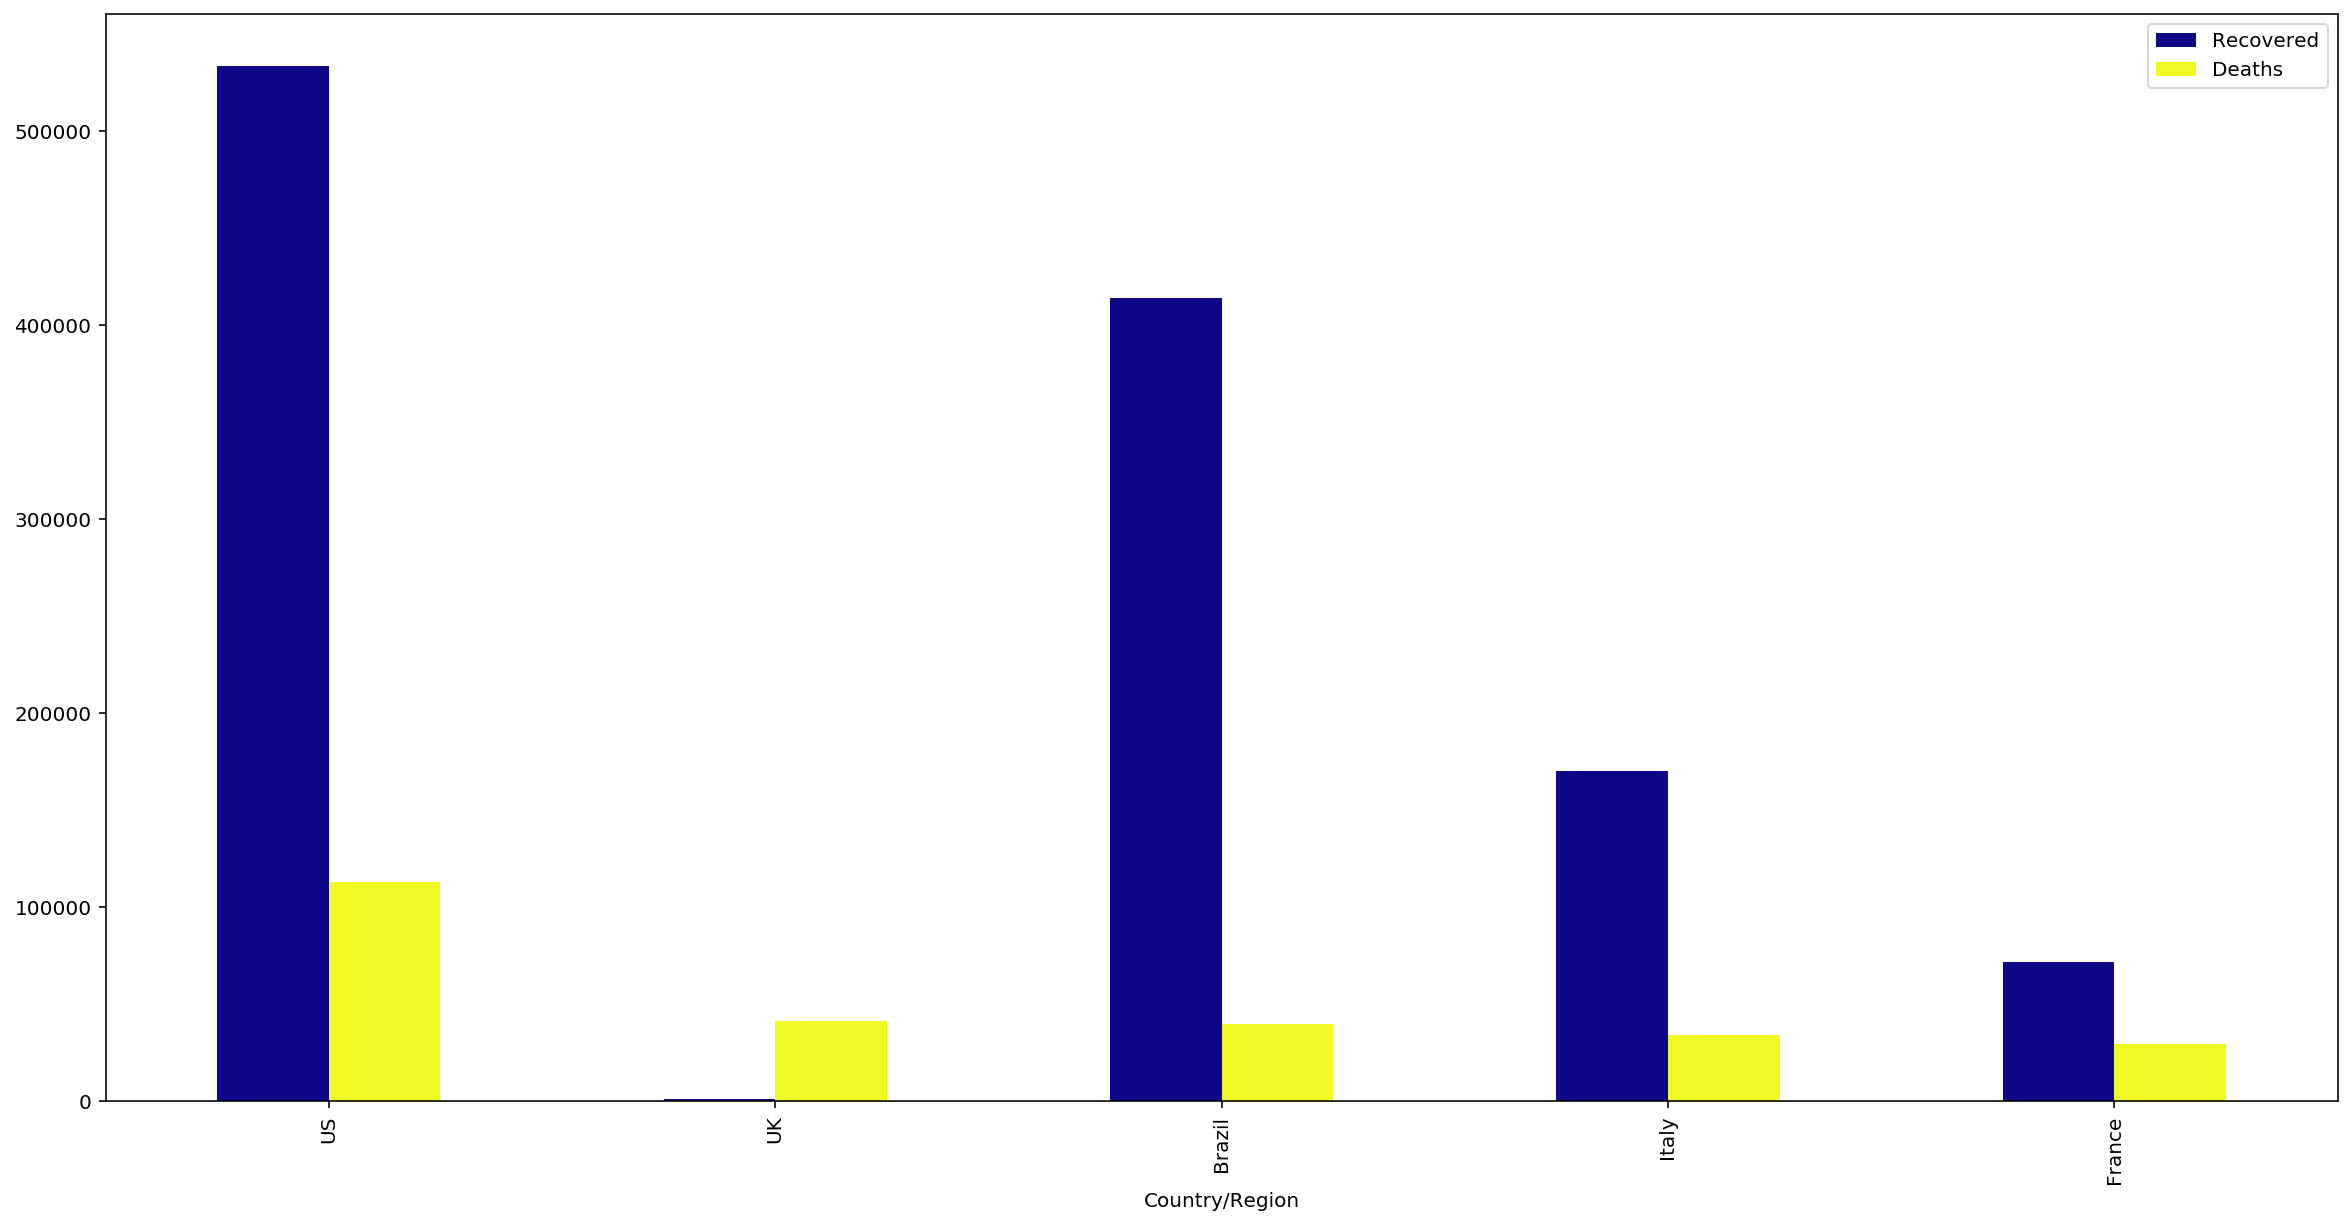

In [55]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

# Covid-19 effect on India